In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs, make_classification, load_breast_cancer
from sklearn.svm import SVC, LinearSVC


from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)
from adspy_shared_utilities import plot_class_regions_for_classifier


np.set_printoptions(precision=2)

### Conjunto de dados

In [3]:
fruits = pd.read_table('../Mod_1/Dfs/fruit_data_with_colors.txt')

feature_names = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names]
y_fruits = fruits['fruit_label']
target_names = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

In [4]:
X_C2, y_C2 = make_classification(n_samples=100, n_features=2,
                                 n_redundant=0, n_informative=2,
                                 n_clusters_per_class=1, flip_y=0.1,
                                 class_sep=0.5, random_state=0)


X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=8,
                        cluster_std=1.3, random_state=4)
y_D2 = y_D2 % 2


cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Máquina de Suporte Vetorial

## Máquina de Suporte Vetorial Linear

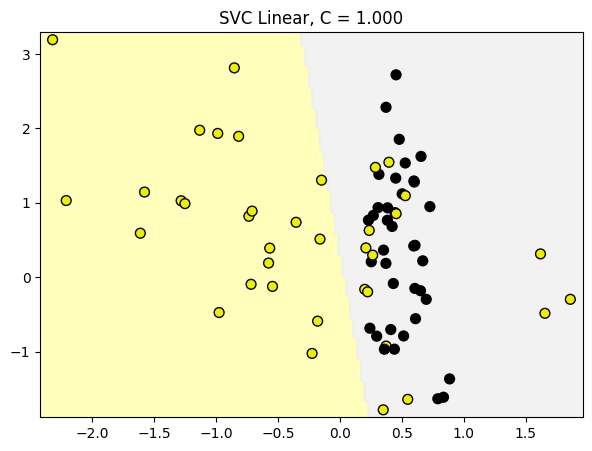

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel='linear', C=this_C).fit(X_train, y_train)
title = f'SVC Linear, C = {this_C:.3f}'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

### Máquina de Suporte Vetorial: Parâmetro C

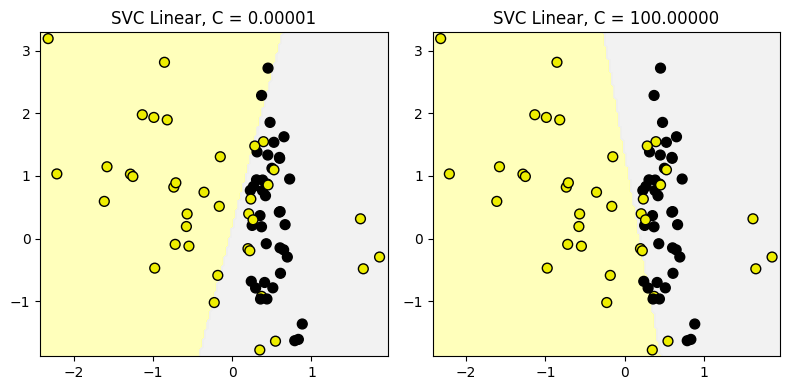

In [6]:
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = f'SVC Linear, C = {this_C:.5f}'
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)

plt.tight_layout()

### Aplicação em um conjunto de dados reais

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = LinearSVC().fit(X_train, y_train)

print('Conjunto de câncer de mama')
print(f'Acurácio do classificador linear SVC no conjunto de treinamento: {clf.score(X_train, y_train):.3f}')
print(f'Acurácio do classificador linear SVC no conjunto de teste: {clf.score(X_test, y_test):.3f}')

Conjunto de câncer de mama
Acurácio do classificador linear SVC no conjunto de treinamento: 0.965
Acurácio do classificador linear SVC no conjunto de teste: 0.965


## Classficação Multi-classe com modelos lineares

### LinearSVC com M classes geram M classes (classificador um vs todos)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state=0)

clf = LinearSVC(C=5, random_state=67).fit(X_train ,y_train)

print(f'Coeficientes: \n {clf.coef_}')
print(f'Intercepto: {clf.intercept_}')

Coeficientes: 
 [[-0.28  0.64]
 [-1.64  1.16]
 [-0.01  0.33]
 [ 1.24 -1.73]]
Intercepto: [-2.71  1.21 -2.75  1.68]


### Resultados Multi-classe no conjunto de dados de frutas

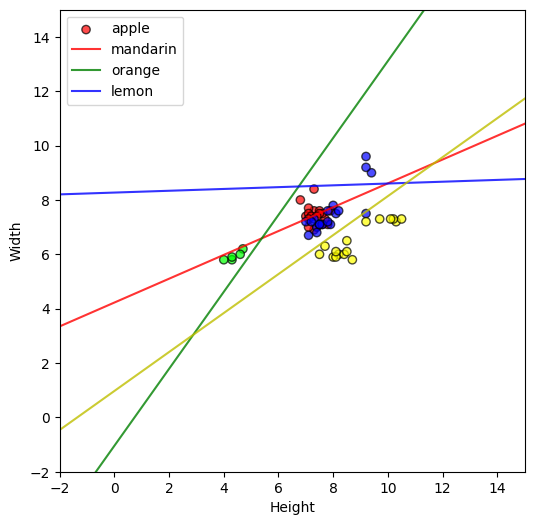

In [9]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(6, 6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']], c=y_fruits_2d, 
            cmap=cmap_fruits, edgecolors='black', alpha=.7)

x_0 = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, colors):
    plt.plot(x_0, -(x_0 * w[0] + b) / w[1], c=color, alpha=.8)

plt.legend(target_names)
plt.xlabel('Height')
plt.ylabel('Width')
plt.xlim(-2, 15)
plt.ylim(-2, 15)
plt.show()
    

## Máquina de Suporte Vetorial (kernelized)

### Classificação

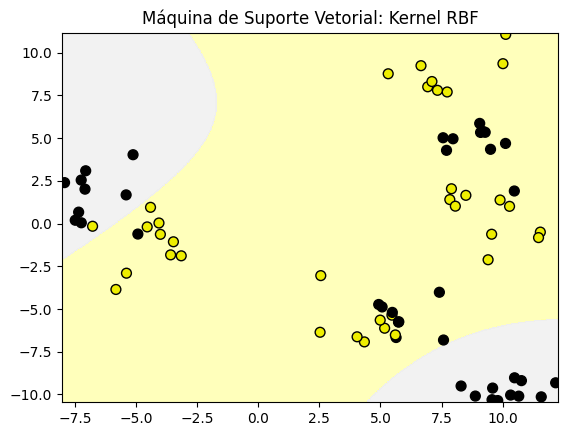

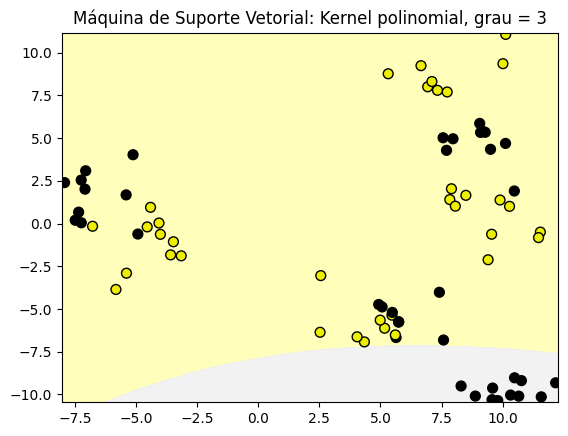

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

plot_class_regions_for_classifier(SVC().fit(X_train, y_train), X_train, y_train,
                                  None, None, 'Máquina de Suporte Vetorial: Kernel RBF')

plot_class_regions_for_classifier(SVC(kernel='poly', degree=3).fit(X_train, y_train),
                                  X_train, y_train, None, None, 'Máquina de Suporte Vetorial: Kernel polinomial, grau = 3')

### Máquina de Suporte Vetorial com kernel RBF: Parâmetro Gama

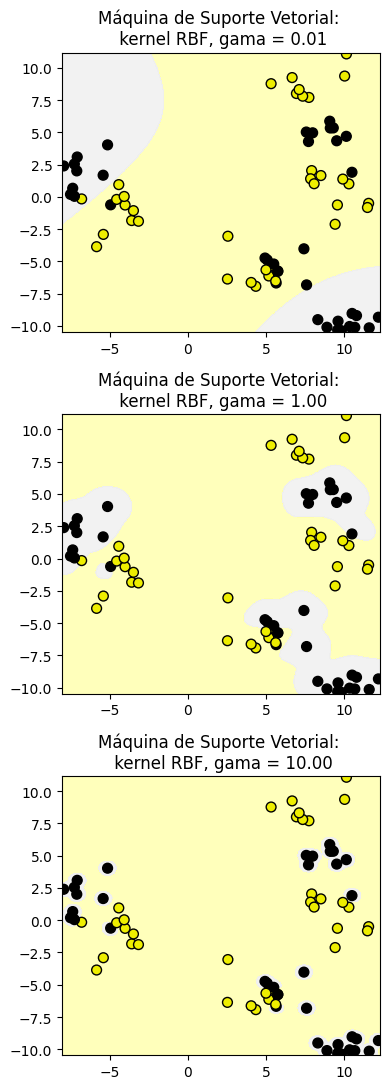

In [11]:
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel='rbf', gamma=this_gamma).fit(X_train, y_train)
    title = f'Máquina de Suporte Vetorial: \n kernel RBF, gama = {this_gamma:.2f}'
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)
    
    plt.tight_layout()

### Máquina de Suporte Vetorial com kernel RBF: Usando ambos parâmetros Gama e C

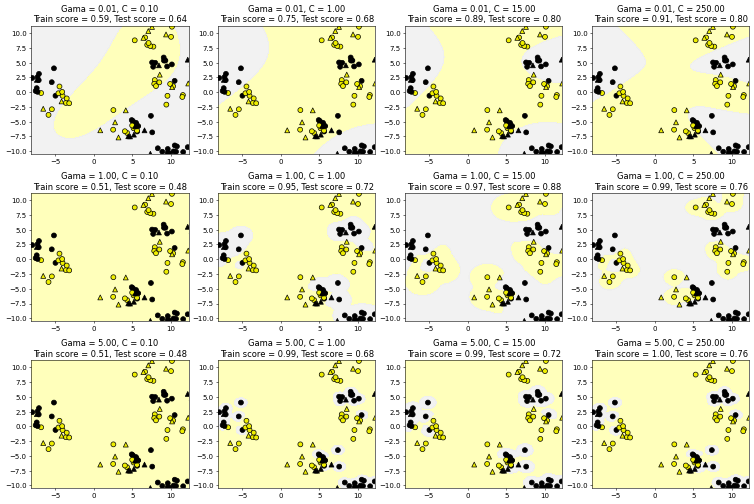

In [12]:
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = f'Gama = {this_gamma:.2f}, C = {this_C:.2f}'
        clf = SVC(kernel='rbf', gamma=this_gamma, C=this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                  X_test, y_test, title, subplot)
        
        plt.tight_layout(pad=.4, w_pad=.5, h_pad=1.0)

### Aplicação de SVMs a um conjunto de dados real: Dados não normalizados

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = SVC(C=10).fit(X_train, y_train)

print('Conjunto de câncer de mama (Características não normalizadas)')
print(f'Acurácio do kernel-RBF da SVC no conjunto de treinamento: {clf.score(X_train, y_train):.3f}')
print(f'Acurácio do kernet-RBF da SVC no conjunto de teste: {clf.score(X_test, y_test):.3f}')

Conjunto de câncer de mama (Características não normalizadas)
Acurácio do kernel-RBF da SVC no conjunto de treinamento: 0.915
Acurácio do kernet-RBF da SVC no conjunto de teste: 0.937


### Aplicação de SVMs a um conjunto de dados real: Dados normalizados com preprocessamento de características

In [14]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)

print('Conjunto de câncer de mama (Características normalizadas)')
print(f'Acurácio do kernel-RBF da SVC no conjunto de treinamento: {clf.score(X_train_scaled, y_train):.3f}')
print(f'Acurácio do kerner-RBF da SVC no conjunto de teste: {clf.score(X_test_scaled, y_test):.3f}')

Conjunto de câncer de mama (Características normalizadas)
Acurácio do kernel-RBF da SVC no conjunto de treinamento: 0.988
Acurácio do kerner-RBF da SVC no conjunto de teste: 0.972
